In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from svm_margin_plot import plot_svm_boundary

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

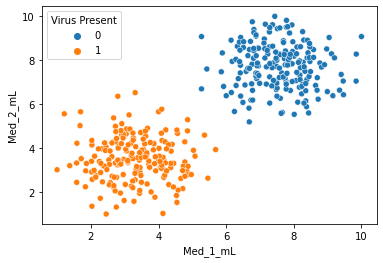

In [5]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

In [6]:
x_values = np.linspace(0, 10, 100)
y_values = -1 * x_values + 11

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

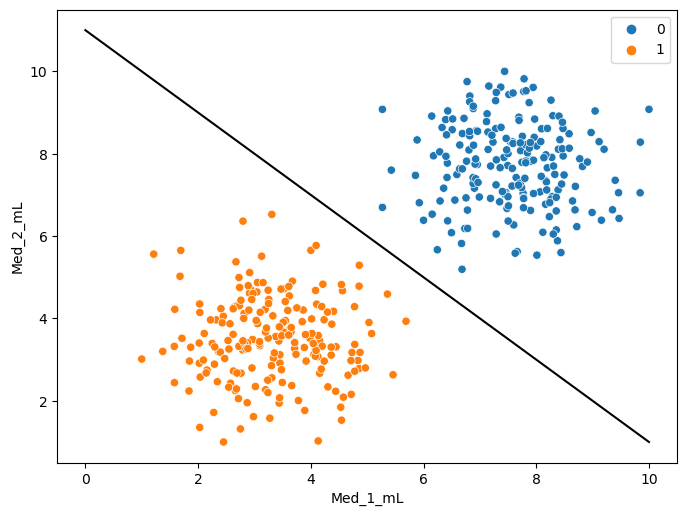

In [7]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')
sns.lineplot(x=x_values, y=y_values, color='black')

<AxesSubplot:xlabel='Virus Present', ylabel='count'>

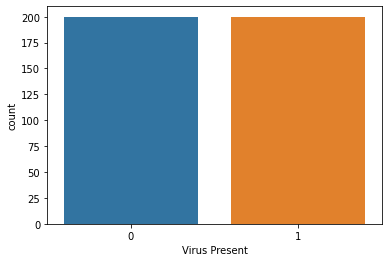

In [8]:
sns.countplot(data=df, x='Virus Present')

<AxesSubplot:xlabel='Virus Present', ylabel='Med_1_mL'>

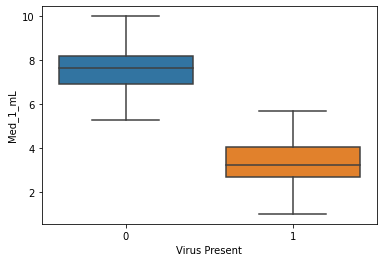

In [9]:
sns.boxplot(data=df, x='Virus Present', y='Med_1_mL')

<AxesSubplot:xlabel='Virus Present', ylabel='Med_2_mL'>

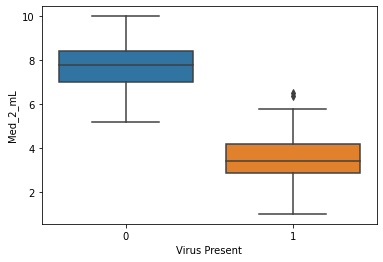

In [10]:
sns.boxplot(data=df, x='Virus Present', y='Med_2_mL')

In [11]:
df['Med_2_mL'][df['Virus Present'] == 1].describe()

count    200.000000
mean       3.507730
std        0.999490
min        1.000000
25%        2.880567
50%        3.426269
75%        4.203161
max        6.526954
Name: Med_2_mL, dtype: float64

In [12]:
df_clean_outlier = df['Med_2_mL'][df['Virus Present'] == 1]

In [13]:
q25, q75 = np.percentile(df_clean_outlier, [25, 75])

In [14]:
IQR = q75 - q25

In [15]:
upper_limit = q75 + IQR * 1.5

In [16]:
upper_limit

6.187050695628894

In [17]:
drop_index = df_clean_outlier[df_clean_outlier > upper_limit].index

In [18]:
df = df.drop(drop_index, axis=0)

## SVC

In [19]:
X = df.drop('Virus Present', axis=1)

In [20]:
y = df['Virus Present']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [60]:
svc_model = SVC(kernel='linear', C=1000)

In [61]:
svc_model.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

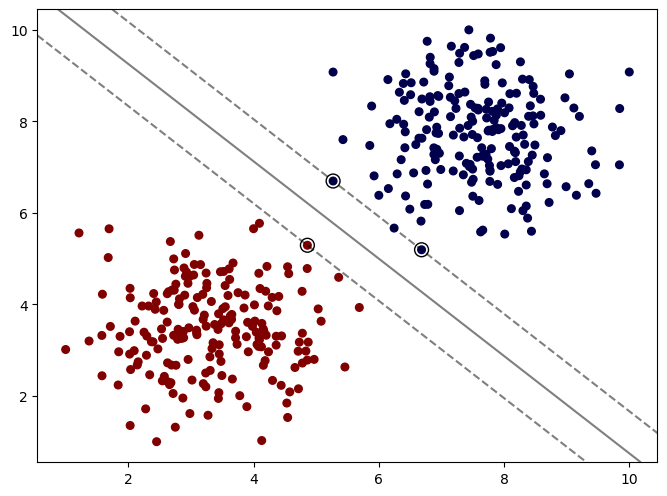

In [62]:
plt.figure(figsize=(8, 6), dpi=100)
plot_svm_boundary(svc_model, X, y)

In [43]:
svc_model = SVC(kernel='linear', C=0.05)

In [44]:
svc_model.fit(X_train, y_train)

SVC(C=0.05, kernel='linear')

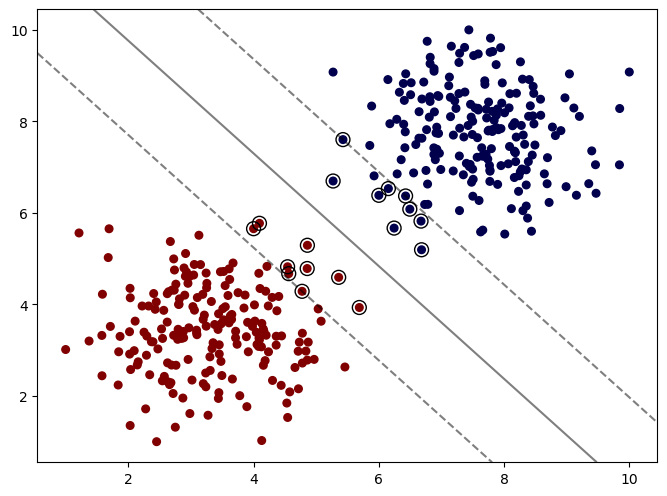

In [45]:
plt.figure(figsize=(8, 6), dpi=100)
plot_svm_boundary(svc_model, X, y)

In [46]:
svc_model = SVC(kernel='rbf', C=1, gamma='scale')

In [47]:
svc_model.fit(X_train, y_train)

SVC(C=1)

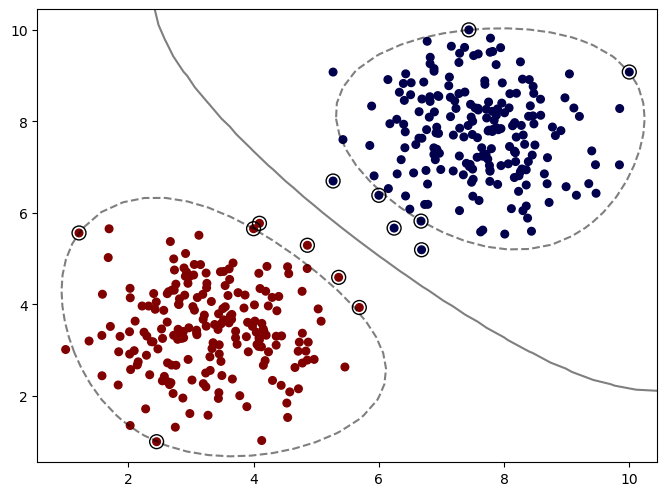

In [48]:
plt.figure(figsize=(8, 6), dpi=100)
plot_svm_boundary(svc_model, X, y)

In [49]:
svc_model = SVC(kernel='poly', degree=2, C=0.05)

In [50]:
svc_model.fit(X_train, y_train)

SVC(C=0.05, degree=2, kernel='poly')

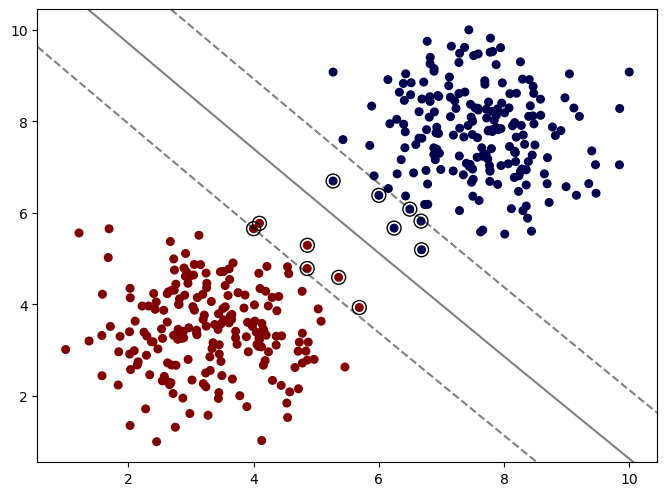

In [51]:
plt.figure(figsize=(8, 6), dpi=100)
plot_svm_boundary(svc_model, X, y)

In [349]:
from sklearn.model_selection import GridSearchCV

In [350]:
svc_model = SVC()

In [351]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [400]:
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [401]:
gridCV_model = GridSearchCV(svc_model, param_grid=param_grid)

In [402]:
gridCV_model.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [403]:
gridCV_model.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [405]:
gridCV_model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [404]:
pd.DataFrame(gridCV_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002332,0.000565,0.001361,0.000431,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.003297,0.000273,0.001454,0.000068,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.001582,0.000109,0.001080,0.000028,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.002332,0.000403,0.001699,0.000932,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.001446,0.000030,0.001014,0.000023,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.001599,0.000060,0.001084,0.000093,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


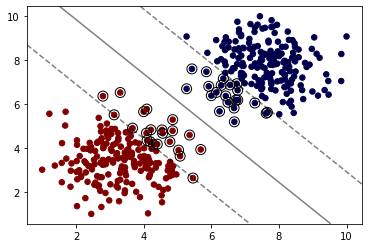

In [397]:
plot_svm_boundary(gridCV_model.best_estimator_, X, y)

## SVR

In [454]:
from sklearn.svm import SVR

In [455]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [456]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

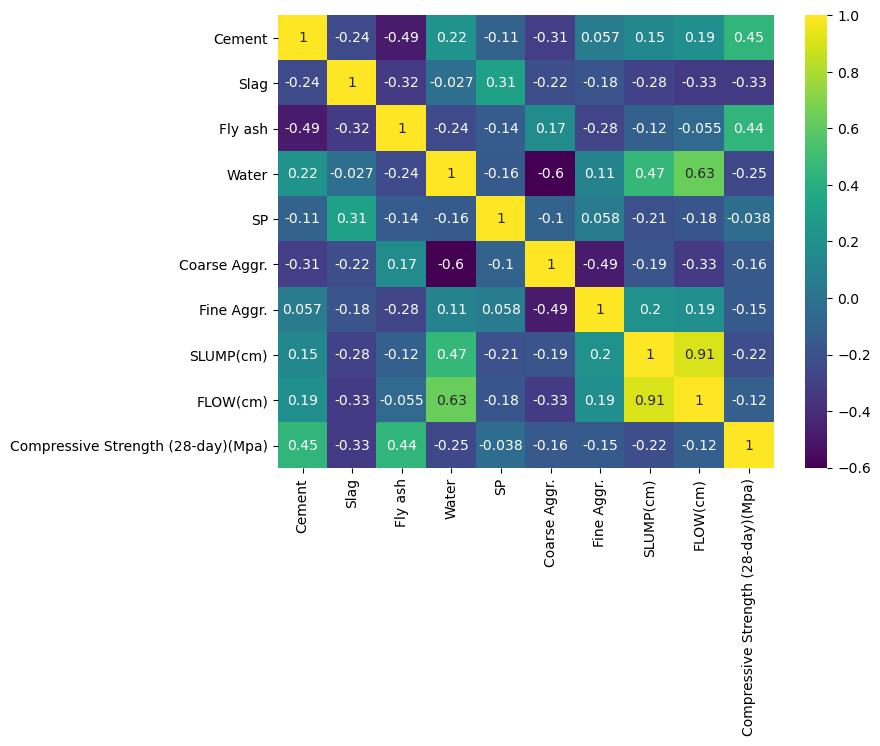

In [457]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Cement'>

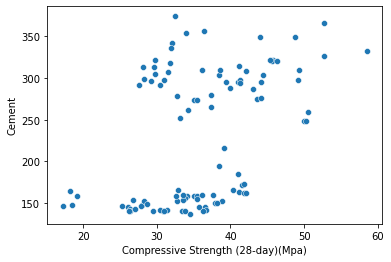

In [458]:
sns.scatterplot(data=df, x='Compressive Strength (28-day)(Mpa)', y='Cement')

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Fly ash'>

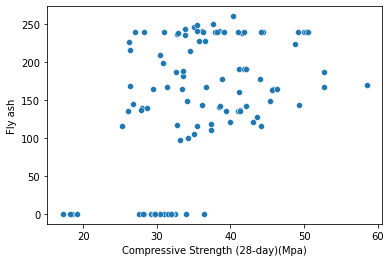

In [459]:
sns.scatterplot(data=df, x='Compressive Strength (28-day)(Mpa)', y='Fly ash')

In [460]:
abs(df.corr()['Compressive Strength (28-day)(Mpa)']).sort_values().tail(6)

SLUMP(cm)                             0.223499
Water                                 0.254320
Slag                                  0.331522
Fly ash                               0.444380
Cement                                0.445656
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [461]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [462]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [463]:
from sklearn.model_selection import train_test_split

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [465]:
from sklearn.preprocessing import StandardScaler

In [466]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [467]:
from sklearn.svm import SVR, LinearSVR

In [468]:
base_model = SVR()

In [469]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [470]:
y_pred = base_model.predict(scaled_X_test)

In [471]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [472]:
mean_absolute_error(y_test, y_pred)

5.236902091259178

In [473]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.695914838327133

In [474]:
y_test.mean()

36.26870967741935

In [475]:
from sklearn.model_selection import GridSearchCV

In [476]:
final_model = SVR()

In [478]:
final_model.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [528]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 
              'kernel': ['sigmoid', 'poly', 'rbf', 'linear'], 
              'gamma': ['scale', 'auto', 0.4, 2.4], 
              'degree': [2, 3, 4], 
              'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [529]:
gridCV_model = GridSearchCV(final_model, param_grid, scoring='neg_mean_squared_error')

In [530]:
gridCV_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto', 0.4, 2.4],
                         'kernel': ['sigmoid', 'poly', 'rbf', 'linear']},
             scoring='neg_mean_squared_error')

In [531]:
mean_test_score_df = pd.DataFrame(gridCV_model.cv_results_)#[['mean_test_score', 'param_kernel']]
# mean_test_score_df['mean_test_score']
mean_test_score_df[['param_degree', 'param_kernel', 'mean_test_score']].groupby(['param_degree', 'param_kernel']).mean()

mean_test_score
param_degree param_kernel                 
2            linear             -31.668619
             poly               -72.614131
             rbf                -54.331811
             sigmoid            -50.800789
3            linear             -31.668619
             poly               -42.007890
             rbf                -54.331811
             sigmoid            -50.800789
4            linear             -31.668619
             poly               -87.912759
             rbf                -54.331811
             sigmoid            -50.800789

In [535]:
gridCV_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [538]:
gridCV_y_pred = gridCV_model.predict(scaled_X_test)

In [539]:
mean_absolute_error(y_test, gridCV_y_pred)

2.5128012210762365

In [540]:
np.sqrt(mean_squared_error(y_test, gridCV_y_pred))

3.178210305119858